In [6]:
from google.colab import drive

drive.mount('/content/drive')
root_path = 'drive/My Drive/Deep_Learning_Udemy/Visualizing_feature_maps/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import  Image
import json
% matplotlib inline

In [0]:
transform = transforms.Compose([
                                transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

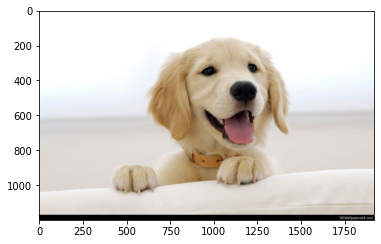

In [7]:
PATH = '/content/drive/My Drive/Deep_Learning_Udemy/Visualizing_feature_maps/'
image = Image.open(PATH +str('dog.jpg'))
plt.imshow(image)

In [8]:
vgg= models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [173]:
vgg.classifier[-1] #vgg.classifier[6]


Linear(in_features=4096, out_features=1000, bias=True)

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg = vgg.to(device)

In [0]:
# Apply transformation on image
image = transform(image)

In [0]:
# Add the batch size
image = image.unsqueeze(0)

In [0]:
# Wrap it up in a Variable
image = Variable(image)

In [0]:
# Transfer it to GPU
image = image.to(device)

In [149]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [0]:
output = vgg(image)

In [151]:
output.shape

torch.Size([1, 1000])

In [0]:
# Transfer the 2D tensor to 1D
output = output.squeeze(0)

In [153]:
output.shape

torch.Size([1000])

In [0]:
labels = json.load(open(PATH+('Imagenet_class_index.json')))

In [155]:
labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [0]:
index = output.max(0)

In [157]:
index

torch.return_types.max(values=tensor(15.1192, grad_fn=<MaxBackward0>), indices=tensor(207))

In [0]:
index = str(index[1].item())

In [159]:
index

'207'

In [0]:
label = labels[index][1]

In [161]:
label

'golden_retriever'

In [0]:
model_list = list(vgg.features.modules())

In [0]:
# Process image to every layer and append output and name of the layer to outputs[] and names[] lists
outputs = []
names = []
for layer in model_list[1:]:
  image = layer(image)
  outputs.append(image)
  names.append(str(layer))

In [164]:
# Print feature maps
for feature_map in outputs:
  print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [0]:
# a = outputs[0].squeeze(0)
# print(a)
# b = torch.sum(a, 0)
# print(b)
# c = a.shape[0]
# print(b/c)

In [0]:
processed = []
for feature_map in outputs:
  feature_map = feature_map.squeeze(0)
  #Convert 3D tensor to 2D, Sum the same element of every channel
  gray_scale = torch.sum(feature_map, 0)
  gray_scale = gray_scale / feature_map.shape[0]
  processed.append(gray_scale.data.cpu().numpy())

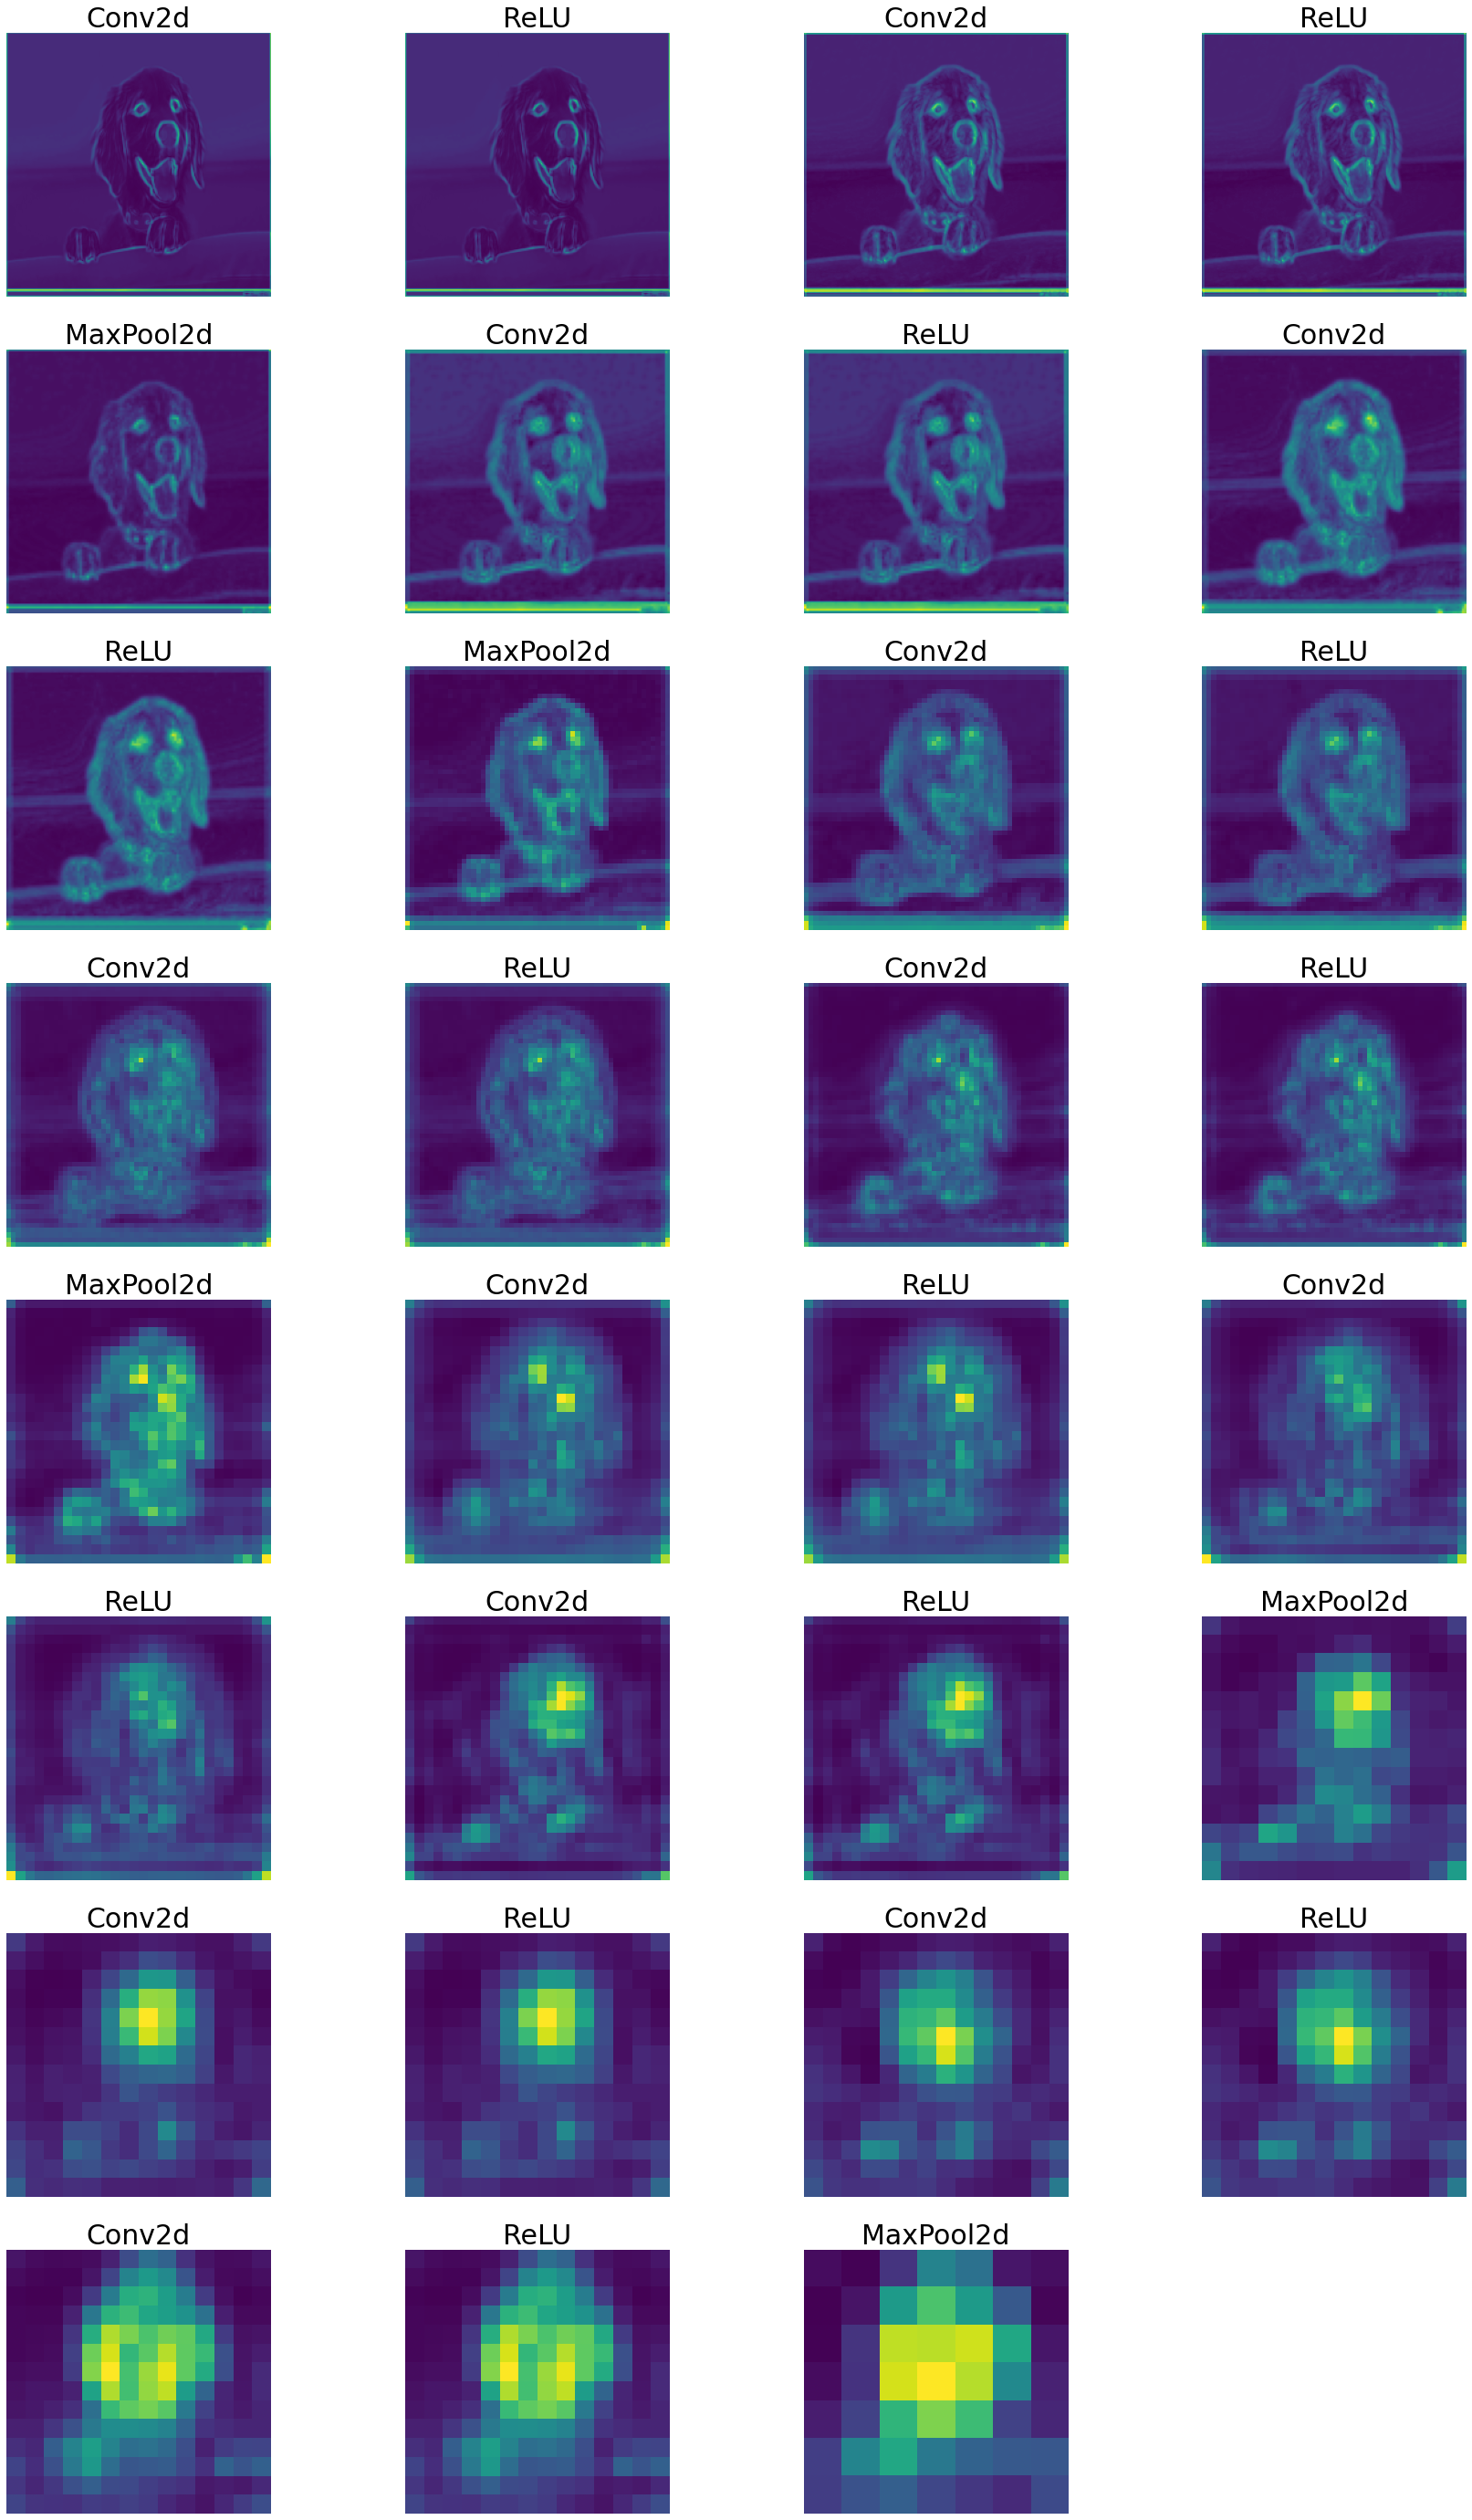

In [170]:
# Plotting feature maps and save
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
  a = fig.add_subplot(8, 4, i+1)
  imgplot = plt.imshow(processed[i])
  a.axis("off")
  a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(PATH+str('feature_maps.jpg'), bbox_inches='tight')